# CSC_52081_EP_TP1

File may be found in: [https://www.lix.polytechnique.fr/~jread](https://www.lix.polytechnique.fr/~jread/courses/inf581/labs/01/).

### Main Objectives 

Intelligent decision making involves several components. Today we study, in the context of a toy (low-dimensional, synthetic) example: *perception* (observation), *knowledge* (representation), *reasoning* (inference), and *acting* (decision-making). We will _not_ look at (today): learning and sequential decision making. Using probabalistic tools covered in the lecture (Bayesian networks, marginalization, ...), the objective is to design a rational/intelligent agent, i.e., an agent that maximizes its expected reward. 


### Instructions

Work your way through the notebook, and provide code where indicated to complete the tasks. Check Moodle for details on how to submit your work.

### Imports

First, we're going to import `numpy` and some utility functions/classes that we will use. make sure the `environment.py` is in your working directory. 

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

And we'll use the environment defined in the file `environment.py`

In [7]:
# if you are using Google Colab, uncomment the following line (then comment again when you have run it): 
# !wget https://www.lix.polytechnique.fr/~jread/courses/inf581/labs/01/environment.py
from environment import Environment


## The Environment and the Agent

Consider an intelligent agent as a robot tasked with catching rats in a storage room. It is night time, and the room is dark. You have to rely on auditory information only, but luckily the room is a mess with paper and other debris that means there are distinct sounds which are emitted by a rat as it touches different objects (namely, crinkling and rustling sounds). The room is rectangular, divided up into $n$ square tiles.  A rat has just entered the room (current time $t=1$). The agent waits $T$ seconds (i.e., until $t=T$), then makes a decision on if and where to pounce (in order to catch the rat).

Let's instantiate an environment, and render a visualisation of it. 

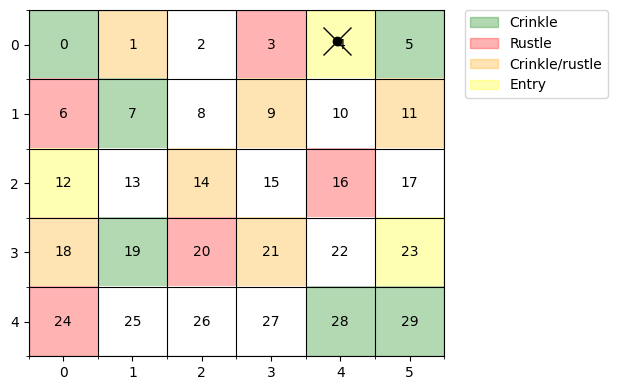

In [8]:
G = np.array([[1,3,0,2,4,1],
              [2,1,0,3,0,3],
              [4,0,3,0,2,0],
              [3,1,2,3,0,4],
              [2,0,0,0,1,1]])

env = Environment(G)
# Plot the environment in state 's_t = 4'
fig, ax = env.render([4], None)
plt.show()

#### Notation

Let $s_t \in \{1,\ldots,n\}$ denote the position (state) of the rat at time step $t$ (one of $n$ grid tiles); starting at some $s_1$ (entry tile). And $\mathbf{x}_t \in \{0,1\}^2$ is the 2-dimensional auditory observation at time $t$ (e.g., $\mathbf{x}_t = [1,0]$ if there is a crinkle but no rustle, etc). The agent accumulates a sequence of **observations** $\mathbf{x}_{1:T} = \mathbf{x}_1,\ldots,\mathbf{x}_T$, with which to make the decision of taking **action** $a$ to pounce (denoting the tile upon which it pounces). The agent obtains **reward** $r(s,a) = 1_{s = a}$, i.e., catching the rat provides reward $1$ and $0$ otherwise. 

As an influence diagram, the problem described can be depicted as follows: 

![pgm](https://www.lix.polytechnique.fr/~jread/courses/inf581/labs/01/fig/pgm.png)

Your task is to model this problem in Python code. Finally, the goal is to implement an `Agent` which will provide the best action $a$ (according to current knowledge, i.e., given observation sequence $\mathbf{x}_{1:T}$) and associated uncertainty.

**Beware** of the potential confusion here: $s_T$ represents the state of the environment but decision making (choosing action $a$) is based on observation $o = \mathbf{x}_{1:T}$. 

The Environment is fully specified for you, as a Markov process 
$$
    s_{t+1} \sim p(\cdot | s_t)
$$
with observations 
$$
    \mathbf{x}_t \sim p( \cdot | s_t)
$$
You can find this functionality in the `step` function. 

You should be able to see by looking at the code, that the rat moves by exactly $1$ square tile, either horizontally or vertically (i.e., taxicab-distance) per time step $t$, within the bounds of the of the room, starting at one of the entry points (uniformly at random). Insofar as the observation function: a 'crinkle' indicator is generated with probability $\theta_1$ when over certain tiles (green, or orange), and with probability $0$ over other tiles; furthermore, it will invoke a 'rustling' is indicated with probability $\theta_2$ over certain tiles (red, or orange), and $0$ otherwise. On orange tiles, both noises are caused independently of each other.


#### Task 1: Generating trajectories 

Complete the `gen_traj` function to generate a trajectory (of length $T$). You have full acces to the environment, e.g., you can call `env.step(...)`. 

In [9]:
def gen_traj(env, T=5):
    ''' Generate a path with associated observations.


        Paramaters
        ----------

        T : int
            how long is the path

        Returns
        -------

        o : (T,d)-shape array
            sequence of observations
        s : T-length array of states
            sequence of tiles
    '''
    # TODO

    return o, s

In [ ]:
# Generate and view (plot) the trajectory
ooo, sss = gen_traj(env,5)
fig, ax = env.render(sss, ooo)
plt.show()

It is important to realise that although we can have full access to the environment, as well as observations, we do not expect (in the 'real world') to see the true path $s_1,\ldots,s_T$ and hence the challenge in estimating $s_T$. For this we will create an `Agent` class.

In [ ]:
class Agent: 

    def __init__(self, env): 
        '''
            env : Environment 
                of the type provided to you
        '''
        self.env = env

    # TODO (optional): Add any auxilliary functions you might use here 


    def P_traj(self, ooo, M=-1):
        '''
        Provides full conditional distribution P(SSS | ooo) where SSS and ooo are sequences of length T.
        $$
            P( Y_1,\ldots,Y_T | o_1,\ldots,o_T )
        $$


        Parameters
        ----------

        ooo : array_like(t, d)
            t observations (of d dimensions each)

        M : int
            -1 indicates to use a brute force solution (exact recovery of the distribution) 
            M > 0 indicates to use M Monte Carlo simulations (this parameter is used in Week 2)


        Returns
        -------

        p : dict(str:float)
            such that p[sss] = P(sss | ooo)
            and if sss not in p, it implies P(sss | ooo) = 0

            important: let sss be a string representation of the state sequence, separated by spaces, e.g., 
            the string representation of np.array([1,2,3,4],dtype=int) should be '1 2 3 4'. 
        '''        
        p = {}
        # TODO 
        return p

        
    def P_S(self, o, t=-1): 
        '''
        Provide P(s_t | o) given observations o from 1,...,T.  

        $$
            P(S_t | o_1,...,o_T ).
        $$
        
        The probability (distribution) of the t-th state, given the observed evidence 'o'.

        Parameters
        ----------

        o : array_like(t,d)
            up to t observations (of d dimensions each)

        t : int
            the state being queried, e.g., 3, or -1 for final state (corresponding to o[-1])

        Returns
        -------

        P : array_like(float,ndim=1) 
            such that P[s] = P(S_t = s | o_1,...,o_t)
        '''
        # TODO 
        return P

    def Q(self, o): 
        '''
            Provide Q(o,a) for all a i.e., the value for any given a under observation o. 

            Parameters
            ----------

            o : array_like(int,ndim=2)
                t observations (of 2 bits each)

            Returns
            -------

            Q : array_like(float,ndim=n_actions)
                such that Q[a] is the value (expected reward) of action a.

        '''
        Q = np.zeros(env.n_states)
        # TODO 
        return Q

    def act(self, obs): 
        '''
        Decide on the best action to take, under the provided observation. 

        Parameters
        ----------

        obs : array_like(int,ndim=2)
            t observations (of 2 bits each)

        Returns
        -------

        a : int
            the chosen action a
        '''

        a = -1
        # TODO 
        return a

In [ ]:
# Let's instantiate our agent
agent = Agent(env)

The Agent is responsible for receiving observation $o = \mathbf{x}_{1:T}$ and producing prediction $a$, i.e., it implements $a = \pi(o)$, i.e., its policy or `act` function as it is called here below. But let's implement the functionality step by step. 

#### Task 2: Complete the `P_traj` function above, which specifies  
$$
    P(S_{1:T} | \mathbf{x}_{1:T})
$$
(returns a distribution, one number associated to each *possible* trajectory $s_1,\ldots,s_T$).


Implementation hint: For this, and remaining tasks. It may be useful to implement for the simple case of a single state observation (single time step) first. 

In [ ]:
# Call your function
P_joint = agent.P_traj(ooo)

# Check should sum to 1 (or close enough)
probs = list(P_joint.values())
assert abs(sum(probs) - 1) <= 0.05

# Extract possible paths
paths = [np.fromstring(k, sep=' ') for k in P_joint.keys()] 

# Take some samples
sample_indices = np.random.choice(len(probs), size=10, p=probs)
trajs = [paths[i].astype(int) for i in sample_indices]

# 